In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt 

import seaborn as sns

import plotly.express as px

import warnings 

warnings.filterwarnings('ignore')

In [4]:
schema = {
    "CNPJ BÁSICO": np.str_,
    "CNPJ ORDEM": np.str_,
    "CNPJ DV": np.str_,
    "IDENTIFICADOR MATRIZ/FILIAL": np.str_,
    "NOME FANTASIA": np.str_,
    "SITUAÇÃO CADASTRAL": np.str_,
    "DATA SITUAÇÃO CADASTRAL": np.str_, 
    "MOTIVO SITUAÇÃO CADASTRAL": np.str_,
    "DATA DE INÍCIO ATIVIDADE": np.str_, 
    "CNAE FISCAL PRINCIPAL": np.str_,
    "CNAE FISCAL SECUNDÁRIA": np.str_,
    "TIPO DE LOGRADOURO": np.str_,
    "LOGRADOURO": np.str_,
    "NÚMERO": np.str_,
    "BAIRRO": np.str_,
    "CEP": np.str_,
    "UF": np.str_,
    "MUNICÍPIO": np.str_,
    "DDD 1": np.str_,
    "TELEFONE 1": np.str_,
    "CORREIO ELETRÔNICO": np.str_,
    "REGIAO": np.str_
}

In [119]:
dados = pd.read_csv("../data/processed/academias_final.csv", sep = ";", dtype = schema)

dados.head()

,CNPJ BÁSICO,CNPJ ORDEM,CNPJ DV,IDENTIFICADOR MATRIZ/FILIAL,NOME FANTASIA,SITUAÇÃO CADASTRAL,DATA SITUAÇÃO CADASTRAL,MOTIVO SITUAÇÃO CADASTRAL,DATA DE INÍCIO ATIVIDADE,CNAE FISCAL PRINCIPAL,...,LOGRADOURO,NÚMERO,BAIRRO,CEP,UF,MUNICÍPIO,DDD 1,TELEFONE 1,CORREIO ELETRÔNICO,REGIAO
0,34183425,0001,03,1,ALMA LIDERANCA APLICADA,02,20190711,00,20190711,7319002,...,VITORIA,88,CIDADE ALTA,95700364,RS,BENTO GONCALVES,54,91160444,NaN,Sul
1,34185978,0001,97,1,UP CENTRO FISICO,02,20190711,00,20190711,9313100,...,ENGENHO VELHO QUADRA 13,SN,SETOR HABITACIONAL FERCAL (SOBRADINHO),73150045,DF,BRASILIA,61,92639029,CONTATO.UPACADEMIAFERCAL@GMAIL.COM,Centro-Oeste
2,34187457,0001,79,1,NaN,02,20190711,00,20190711,9001999,...,APINAJES,445,PERDIZES,05017000,SP,SAO PAULO,11,20130863,SETEC_CONTABIL@UOL.COM.BR,Sudeste
3,34200040,0001,07,1,IRON MUSCLE,02,20190712,00,20190712,9313100,...,ALEGRETE,505,MARINSKY,95585000,RS,ARROIO DO SAL,51,91800665,VIVANFIT@GMAIL.COM,Sul
4,34201548,0001,11,1,ASMF,02,20190712,00,20190712,9313100,...,DO MANGUEIRA,S/N,ILHA DE SANTA RITA,57160000,AL,MARECHAL DEODORO,82,32606021,maatiasaraujo@hotmail.com,Nordeste


In [86]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108938 entries, 0 to 108937
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   CNPJ BÁSICO                  108938 non-null  object
 1   CNPJ ORDEM                   108938 non-null  object
 2   CNPJ DV                      108938 non-null  object
 3   IDENTIFICADOR MATRIZ/FILIAL  108938 non-null  object
 4   NOME FANTASIA                85341 non-null   object
 5   SITUAÇÃO CADASTRAL           108938 non-null  object
 6   DATA SITUAÇÃO CADASTRAL      108938 non-null  object
 7   MOTIVO SITUAÇÃO CADASTRAL    108938 non-null  object
 8   DATA DE INÍCIO ATIVIDADE     108938 non-null  object
 9   CNAE FISCAL PRINCIPAL        108938 non-null  object
 10  CNAE FISCAL SECUNDÁRIA       80635 non-null   object
 11  TIPO DE LOGRADOURO           108868 non-null  object
 12  LOGRADOURO                   108938 non-null  object
 13  NÚMERO             

In [14]:
dados.columns

Index(['CNPJ BÁSICO', 'CNPJ ORDEM', 'CNPJ DV', 'IDENTIFICADOR MATRIZ/FILIAL',
       'NOME FANTASIA', 'SITUAÇÃO CADASTRAL', 'DATA SITUAÇÃO CADASTRAL',
       'MOTIVO SITUAÇÃO CADASTRAL', 'DATA DE INÍCIO ATIVIDADE',
       'CNAE FISCAL PRINCIPAL', 'CNAE FISCAL SECUNDÁRIA', 'TIPO DE LOGRADOURO',
       'LOGRADOURO', 'NÚMERO', 'BAIRRO', 'CEP', 'UF', 'MUNICÍPIO', 'DDD 1',
       'TELEFONE 1', 'CORREIO ELETRÔNICO', 'REGIAO'],
      dtype='object')

In [120]:
dados["CNPJ COMPLETO"] = dados["CNPJ BÁSICO"] + dados["CNPJ ORDEM"] + dados["CNPJ DV"]

In [121]:
dados["DATA SITUAÇÃO CADASTRAL"] = pd.to_datetime(dados["DATA SITUAÇÃO CADASTRAL"], format = "%Y%m%d", errors = "coerce")

dados["DATA SITUAÇÃO CADASTRAL"] = dados["DATA SITUAÇÃO CADASTRAL"].dt.strftime("%d/%m/%Y")

dados["DATA DE INÍCIO ATIVIDADE"] = pd.to_datetime(dados["DATA DE INÍCIO ATIVIDADE"], format = "%Y%m%d", errors = "coerce")

In [122]:
dados["ANO INICIO"] = dados["DATA DE INÍCIO ATIVIDADE"].dt.year

dados["MES INICIO"] = dados["DATA DE INÍCIO ATIVIDADE"].dt.month_name()

aberturas_por_ano = dados.groupby("ANO INICIO").size().reset_index(name="TOTAL ABERTURAS")

aberturas_por_mes_ano = dados.groupby(["ANO INICIO", "MES INICIO"]).size().reset_index(name="TOTAL ABERTURAS")

In [123]:
aberturas_por_ano, aberturas_por_mes_ano

(    ANO INICIO  TOTAL ABERTURAS
 0         1946                1
 1         1949                2
 2         1960                1
 3         1965                2
 4         1966               21
 ..         ...              ...
 59        2021             9278
 60        2022            10092
 61        2023            12274
 62        2024            14305
 63        2025             2530
 
 [64 rows x 2 columns],
      ANO INICIO MES INICIO  TOTAL ABERTURAS
 0          1946  September                1
 1          1949       July                1
 2          1949      March                1
 3          1960   November                1
 4          1965   December                2
 ..          ...        ...              ...
 647        2024   November             1023
 648        2024    October             1266
 649        2024  September             1202
 650        2025   February              502
 651        2025    January             2028
 
 [652 rows x 3 columns])

In [124]:
dados["DATA DE INÍCIO ATIVIDADE"] = dados["DATA DE INÍCIO ATIVIDADE"].dt.strftime("%d/%m/%Y")

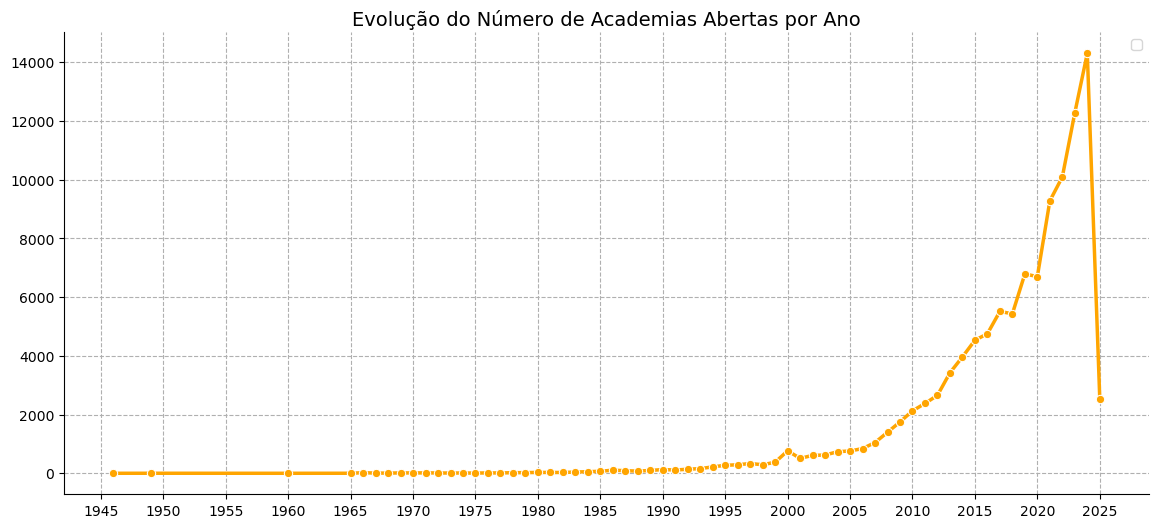

In [144]:
plt.figure(figsize=(14,6))

sns.lineplot(data = aberturas_por_ano,
            x = "ANO INICIO",
            y = "TOTAL ABERTURAS",
            marker='o',
            color = "orange",
            legend = False,
            linewidth = 2.5)

plt.title("Evolução do Número de Academias Abertas por Ano", fontsize = 14, pad = 5)

plt.legend()

plt.ylabel("")

plt.xlabel("")

plt.xticks(range(1945, 2026, 5))

plt.grid(True, linestyle = "--")

sns.despine()

plt.show()

In [156]:
dados_decada = aberturas_por_mes_ano[aberturas_por_mes_ano["ANO INICIO"] >= 2010]

dados_decada

,ANO INICIO,MES INICIO,TOTAL ABERTURAS
470,2010,April,174
471,2010,August,167
472,2010,December,150
473,2010,February,163
474,2010,January,149
...,...,...,...
647,2024,November,1023
648,2024,October,1266
649,2024,September,1202
650,2025,February,502


In [169]:
dados_decada = dados_decada[dados_decada["ANO INICIO"] < 2025]

dados_decada

,ANO INICIO,MES INICIO,TOTAL ABERTURAS
470,2010,April,174
471,2010,August,167
472,2010,December,150
473,2010,February,163
474,2010,January,149
...,...,...,...
645,2024,March,1195
646,2024,May,1155
647,2024,November,1023
648,2024,October,1266


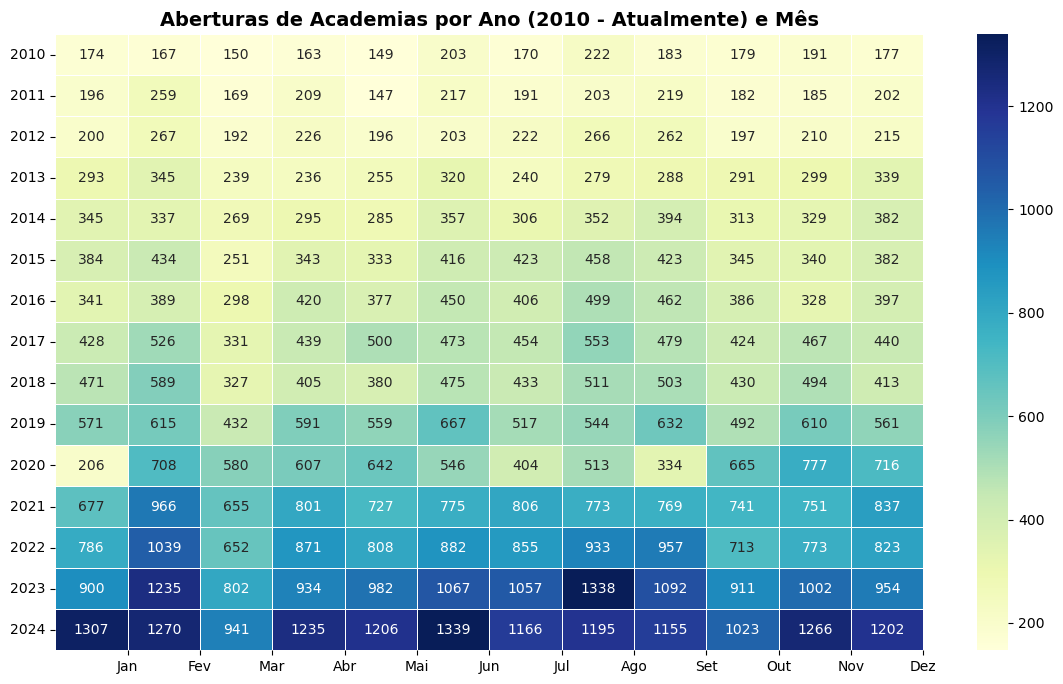

In [172]:
heatmap_data = dados_decada.pivot_table(
    index = "ANO INICIO",
    columns = "MES INICIO",
    values = "TOTAL ABERTURAS",
    fill_value = 0
)

plt.figure(figsize = (14, 8))
sns.heatmap(
    heatmap_data,
    cmap = "YlGnBu",
    annot = True,
    fmt = ".0f",    
    linewidths = 0.5
)

plt.title("Aberturas de Academias por Ano (2010 - Atualmente) e Mês", fontsize = 14, fontweight = "bold")

plt.xlabel("")

plt.ylabel("")

plt.xticks(ticks = range(1, 13), labels = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])

plt.yticks(rotation = 0)

plt.show()

In [173]:
qntd_uf = dados["UF"].value_counts().reset_index()

qntd_uf = qntd_uf.drop(index = 27)

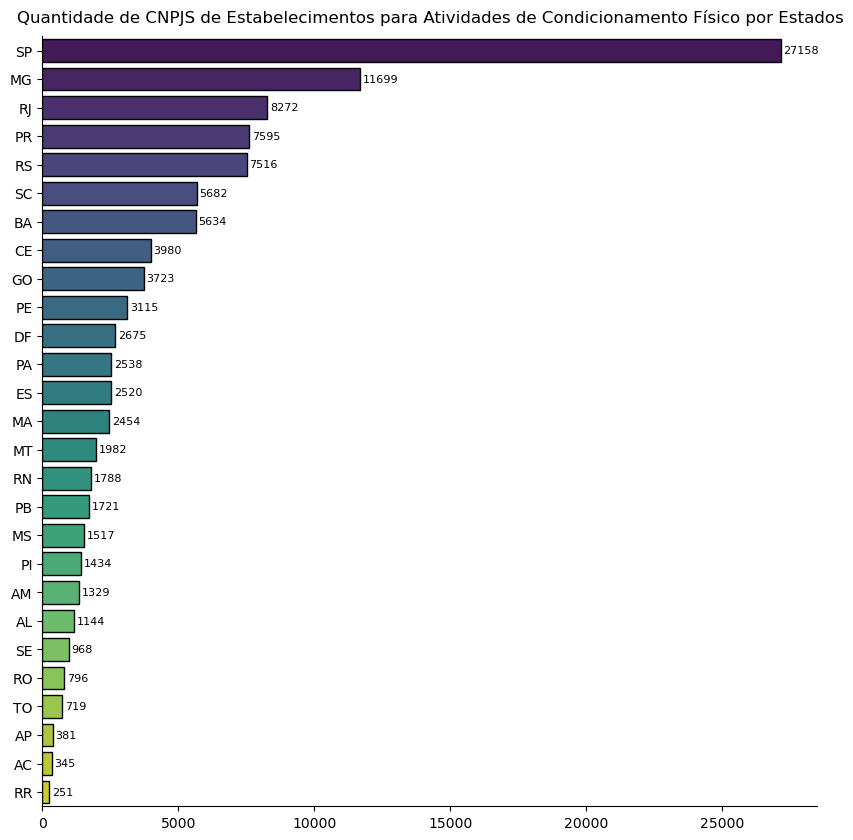

In [174]:
plt.figure(figsize = (10,10))

grafico_qntd = sns.barplot(data = qntd_uf, 
                            x = "count", 
                            y = "UF", 
                            hue = "UF", 
                            palette = "viridis", 
                            edgecolor = "Black", 
                            legend = False)

for container in grafico_qntd.containers:
    grafico_qntd.bar_label(container, padding = 2, fontsize = 8)

plt.title("Quantidade de CNPJS de Estabelecimentos para Atividades de Condicionamento Físico por Estados", fontsize = 12, pad = 10)

plt.xlabel("")

plt.ylabel("")

sns.despine()

plt.show()

In [175]:
top_cidades = dados["MUNICÍPIO"].value_counts().head(10)

top_cidades

MUNICÍPIO
SAO PAULO         8400
RIO DE JANEIRO    3771
BRASILIA          2675
BELO HORIZONTE    1934
CURITIBA          1851
FORTALEZA         1562
PORTO ALEGRE      1523
SALVADOR          1274
GOIANIA           1176
CAMPINAS          1058
Name: count, dtype: int64

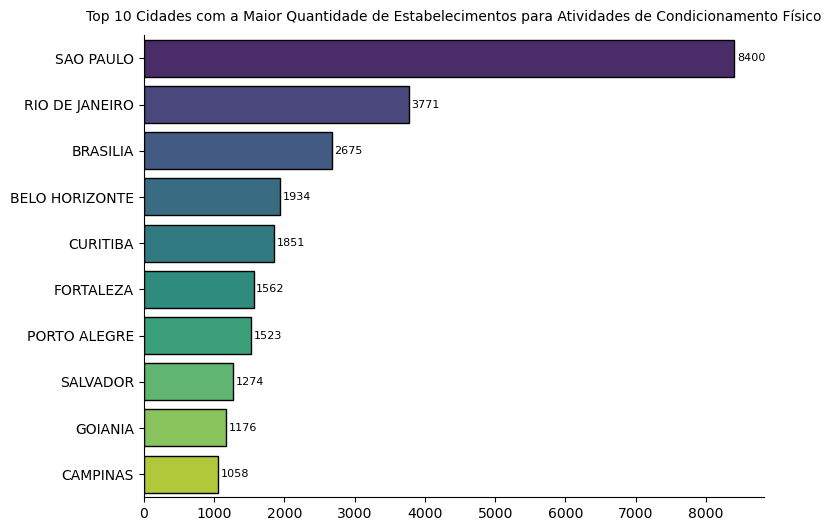

In [177]:
plt.figure(figsize = (8, 6))

grafico_qntd = sns.barplot(data = pd.DataFrame(top_cidades), 
                            x = top_cidades.values, 
                            y = top_cidades.index, 
                            hue = top_cidades.index, 
                            palette = "viridis", 
                            edgecolor = "Black", 
                            legend = False)

for container in grafico_qntd.containers:
    grafico_qntd.bar_label(container, padding = 2, fontsize = 8)

plt.title("Top 10 Cidades com a Maior Quantidade de Estabelecimentos para Atividades de Condicionamento Físico", fontsize = 10, pad = 10)

plt.xlabel("")

plt.ylabel("")

sns.despine()

plt.show()